In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Download datastet

In [28]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [29]:
len(X_train)

60000

In [30]:
len(X_test)

10000

In [31]:
X_train[0].shape

(28, 28)

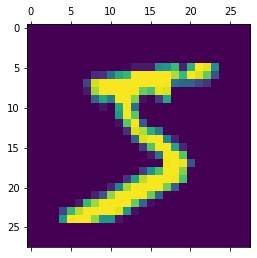

In [32]:
plt.matshow(X_train[0])

In [33]:
y_train[2]

4

In [34]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

### Scale the values between 0 and 1

In [35]:
X_train = X_train / 255
X_test = X_test / 255

### Flatten the dataset to convert the 28 * 28 image to a 1D array

In [36]:
X_train_flattened = X_train.reshape(len(X_train) , 28*28)
X_test_flattened = X_test.reshape(len(X_test) , 28*28)

In [37]:
X_test_flattened.shape

(10000, 784)

### Create a basic model

In [38]:
model = keras.Sequential([
    # 10 Possible outputs
    keras.layers.Dense(units = 10 , input_shape = (784,) , activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam' , 
    loss = 'sparse_categorical_crossentropy' , 
    metrics = ['accuracy']
)

model.fit(X_train_flattened , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4707 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9260


In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Evaluate model accuracy on test dataset

In [40]:
model.evaluate(X_test_flattened , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2660 - accuracy: 0.9252


[0.2659732401371002, 0.9251999855041504]

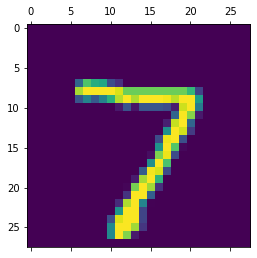

In [42]:
plt.matshow(X_test[0])

In [43]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.2054056e-02, 4.3055729e-07, 6.2429287e-02, 9.5264167e-01,
       1.7344118e-03, 8.2828090e-02, 1.8936527e-06, 9.9977869e-01,
       8.6132050e-02, 6.4767909e-01], dtype=float32)

In [44]:
np.argmax(y_predicted[0])

7

### Create confusion Matrix for the model

Text(69.0, 0.5, 'Truth')

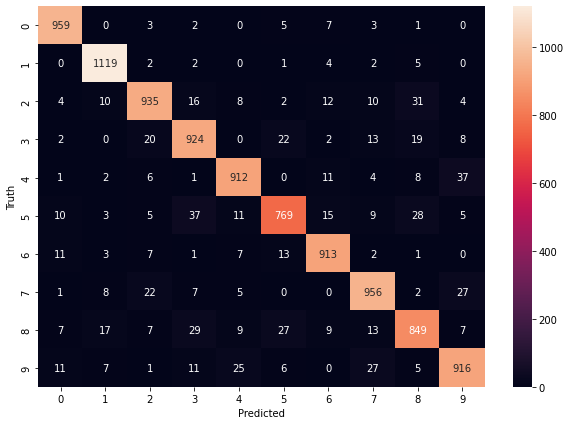

In [47]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_labels)

import seaborn as sns
plt.figure(figsize = (10 , 7))
sns.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Create a model with hidden layers

In [49]:
model = keras.Sequential([
    # 100 neutrons in 1 hidden layer
    keras.layers.Dense(units = 100 , input_shape = (784,) , activation = 'relu') , 
    keras.layers.Dense(units = 10 , activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam' , 
    loss = 'sparse_categorical_crossentropy' , 
    metrics = ['accuracy']
)

model.fit(X_train_flattened , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2717 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1232 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0664 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0515 - accuracy: 0.9845


In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### Evaluate model accuracy on test set

In [51]:
model.evaluate(X_test_flattened , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.9772


[0.07717672735452652, 0.9771999716758728]

In [52]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

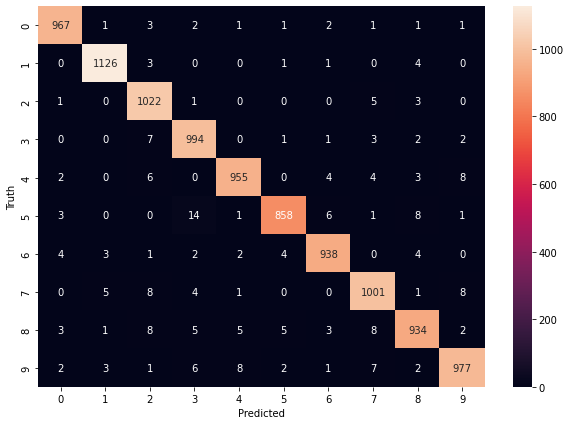

In [53]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_labels)

import seaborn as sns
plt.figure(figsize = (10 , 7))
sns.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Create model with Flatten() function

In [54]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28 , 28)) , 
    keras.layers.Dense(units = 100 , activation = 'relu') , 
    keras.layers.Dense(units = 10 , activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam' , 
    loss = 'sparse_categorical_crossentropy' , 
    metrics = ['accuracy']
)

model.fit(X_train , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2710 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1217 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0855 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0644 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0506 - accuracy: 0.9844
